In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def initial_params(layer_dims):
    np.random.seed(3)
    params={}
    L=len(layer_dims)
    for l in range (1,L):
        params['weights'+str(l)]=np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        params['bias'+str(l)]=np.zeros((layer_dims[l],1))
    return params

In [5]:
#sigmoid function
def sigmoid(z):
    sig=1/(1+np.exp(-z))
    cache=(z)
    return sig,cache

In [7]:
#forward propotion
def forward_prop(x,params):
    a=x
    caches=[]
    l=len(params)//2
    for l in range(1,l+1):
        a_prev=a
        z=np.dot(params['weights'+str(l)],a_prev)+params["bias"+str(l)]
        linear_cache=(a_prev,params['weights'+str(l)],params['bias'+str(l)])
        a,activation_cache=sigmoid(z)
        cache=(linear_cache,activation_cache)
        caches.append(cache)
    return a,caches

In [9]:
def cost_function(A, Y):
    m = Y.shape[1]
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) 
    return cost

In [11]:
def one_layer_backward(dA, cache):
    linear_cache, activation_cache = cache
    Z = activation_cache
    sig, _ = sigmoid(Z)
    dZ = dA * sig * (1 - sig)
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    return dA_prev, dW, db

In [13]:
def backprop(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)

    dAL = -(np.divide(Y, AL) - np.divide(1-Y, 1-AL))

    current_cache = caches[L-1]
    grads['dA'+str(L)], grads['dW'+str(L)], grads['db'+str(L)] = one_layer_backward(dAL, current_cache)

    for l in reversed(range(L-1)):

        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = one_layer_backward(grads["dA" + str(l+2)], current_cache)
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [15]:
def update_parameters(params, grads, learning_rate):
    L = len(params) // 2
    for l in range(1, L + 1):
        params['weights' + str(l)] -= learning_rate * grads['dW' + str(l)]
        params['bias' + str(l)] -= learning_rate * grads['db' + str(l)]
    return params

In [17]:
def train(X, Y, layer_dims, epochs, lr):
    params = initial_params(layer_dims)
    cost_history = []
    for i in range(epochs):
        Y_hat, caches = forward_prop(X, params)
        cost = cost_function(Y_hat, Y)
        cost_history.append(cost)
        grads = backprop(Y_hat, Y, caches)

        params = update_parameters(params, grads, lr)


    return params, cost_history

In [19]:
def predict(X, params):
    Y_hat, _ = forward_prop(X, params)
    predictions = (Y_hat > 0.5)  # Threshold at 0.5
    return predictions

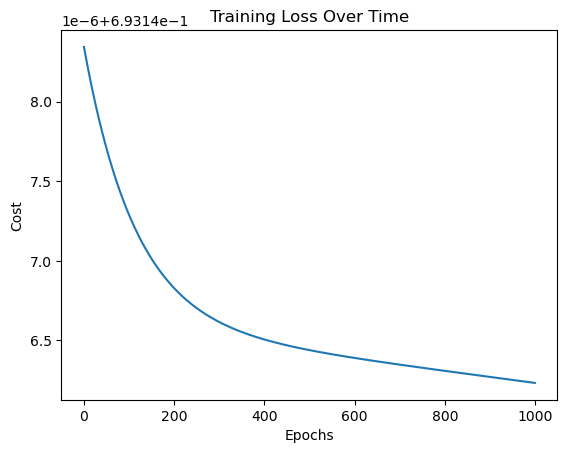

Predictions: [[False False False False]]


In [21]:
# Define the data
X = np.array([[0.1, 0.2, 0.3, 0.4], 
              [0.5, 0.6, 0.7, 0.8]])
Y = np.array([[0, 1, 0, 1]])

# Define the architecture
layer_dims = [2, 3, 1]

# Train the network
params, cost_history = train(X, Y, layer_dims, epochs=1000, lr=0.01)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Training Loss Over Time")
plt.show()

# Make predictions
predictions = predict(X, params)
print("Predictions:", predictions)
